분석의 목표 정의
어떠한 경우에 이탈이 높았는지 찾아보기 - 그에 따른 해결방안 제시 +@ 단순히 데이터에 적힌 변수들 뿐만 아니라 변수 간 조합을 통해 특징 있는 변수조합을 찾아내 어디에서 이탈률의 기여가 높았는지 확인 +@ 이탈율이 제일 높은 조합 대신 이탈 총금액이 제일 높았던 변수조합도 찾아보기 +@ 좌표를 통해 지역이탈률 확인하기
충성 고객과 신규 고객을 나름의 기준을 가지고 분리하여 그들의 특징을 가지고 분석해 적절한 타겟 마케팅 제안

In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/yoonjihun/Downloads/Churn.csv", index_col=0)

In [ ]:
#import pandas as pd

#df = pd.read_csv("/Users/yoonjihun/Downloads/Churn.csv")

#column_names = df.columns.tolist()
#data_types = df.dtypes.tolist()

#if len(column_names) > len(data_types):
#    column_names = column_names[:len(data_types)]
#elif len(data_types) > len(column_names):
#    data_types = data_types[:len(column_names)]

#table_first = pd.DataFrame({'Column': column_names, 'Data Type': data_types}).head(10)
#table_second = pd.DataFrame({'Column': column_names[10:20], 'Data Type': data_types[10:20]})
#table_third = pd.DataFrame({'Column': column_names[20:30], 'Data Type': data_types[20:30]})
#table_fourth = pd.DataFrame({'Column': column_names[30:40], 'Data Type': data_types[30:40]})

#table = pd.concat([table_first, table_second, table_third, table_fourth], axis=1)

#print(table)

# 발표자료 ppt에 넣을 표를 그려보려 했지만 표가 나뉘게 나눠서 이건 스킵

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

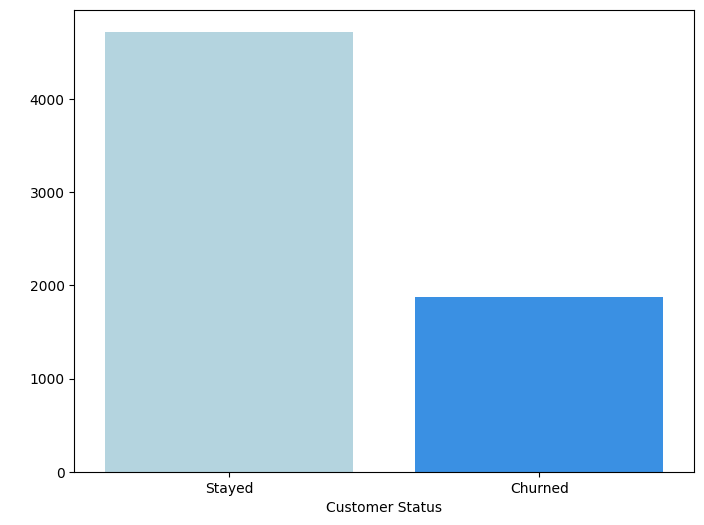

In [5]:
df_new['customer_status'].value_counts()

plt.figure(figsize=(8,6))
sns.countplot(data=df_new, x='customer_status', palette=['lightblue', 'dodgerblue'])
plt.xlabel('Customer Status')
plt.ylabel(' ')
plt.show()

# 전체 데이터 셋 중 이탈 고객과 유지 고객의 수 확인

각 변수들의 범주들의 철회, 유지 여부의 상관관계를 시각화하기 위하여 새로운 데이터프레임(df_new) 생성

In [19]:
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
df_new = df.loc[df['customer_status'] != 'Joined'].copy()

df_new.drop(['zip_code', 'latitude', 'longitude'], axis=1, inplace=True)
# 관련없는 컬럼인 우편번호, 위도, 경도 삭제

/var/folders/29/7c00n9xn5cl7tblmbcp6y61h0000gn/T/ipykernel_1915/1987444927.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df_new.corr()


<Axes: >

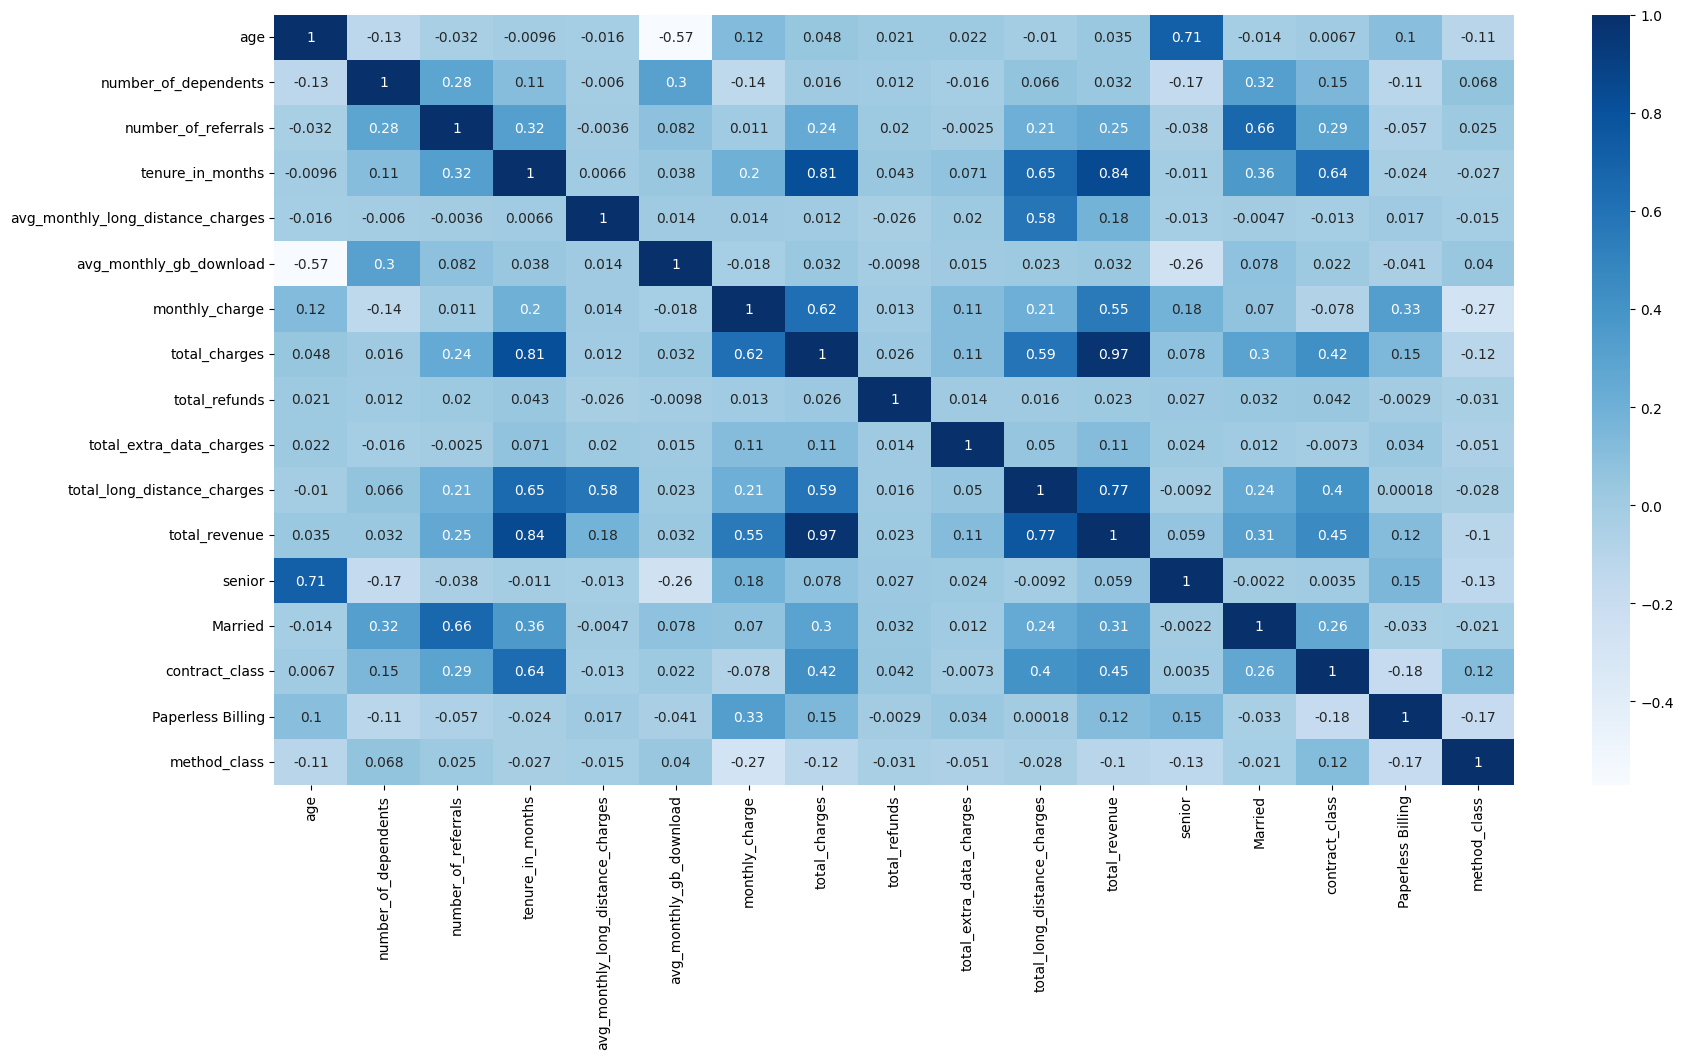

In [30]:
data = df_new.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data, annot = True, cmap = 'Blues')
# 히트맵 시각화를 통해 각 변수들 간의 상관관계 확인

In [ ]:
df_new.info()

숫자형 컬럼과 아닌 컬럼을 구분하여 따로 시각화

In [31]:
num = [cname for cname in df_new.columns if df_new[cname].dtype in ['int64', 'float64']]
df_new_num = df_new[num]

cat = [cname for cname in df_new.columns if df_new[cname].nunique()<10 and df_new[cname].dtype == 'object']
df_new_cat = df_new[cat]

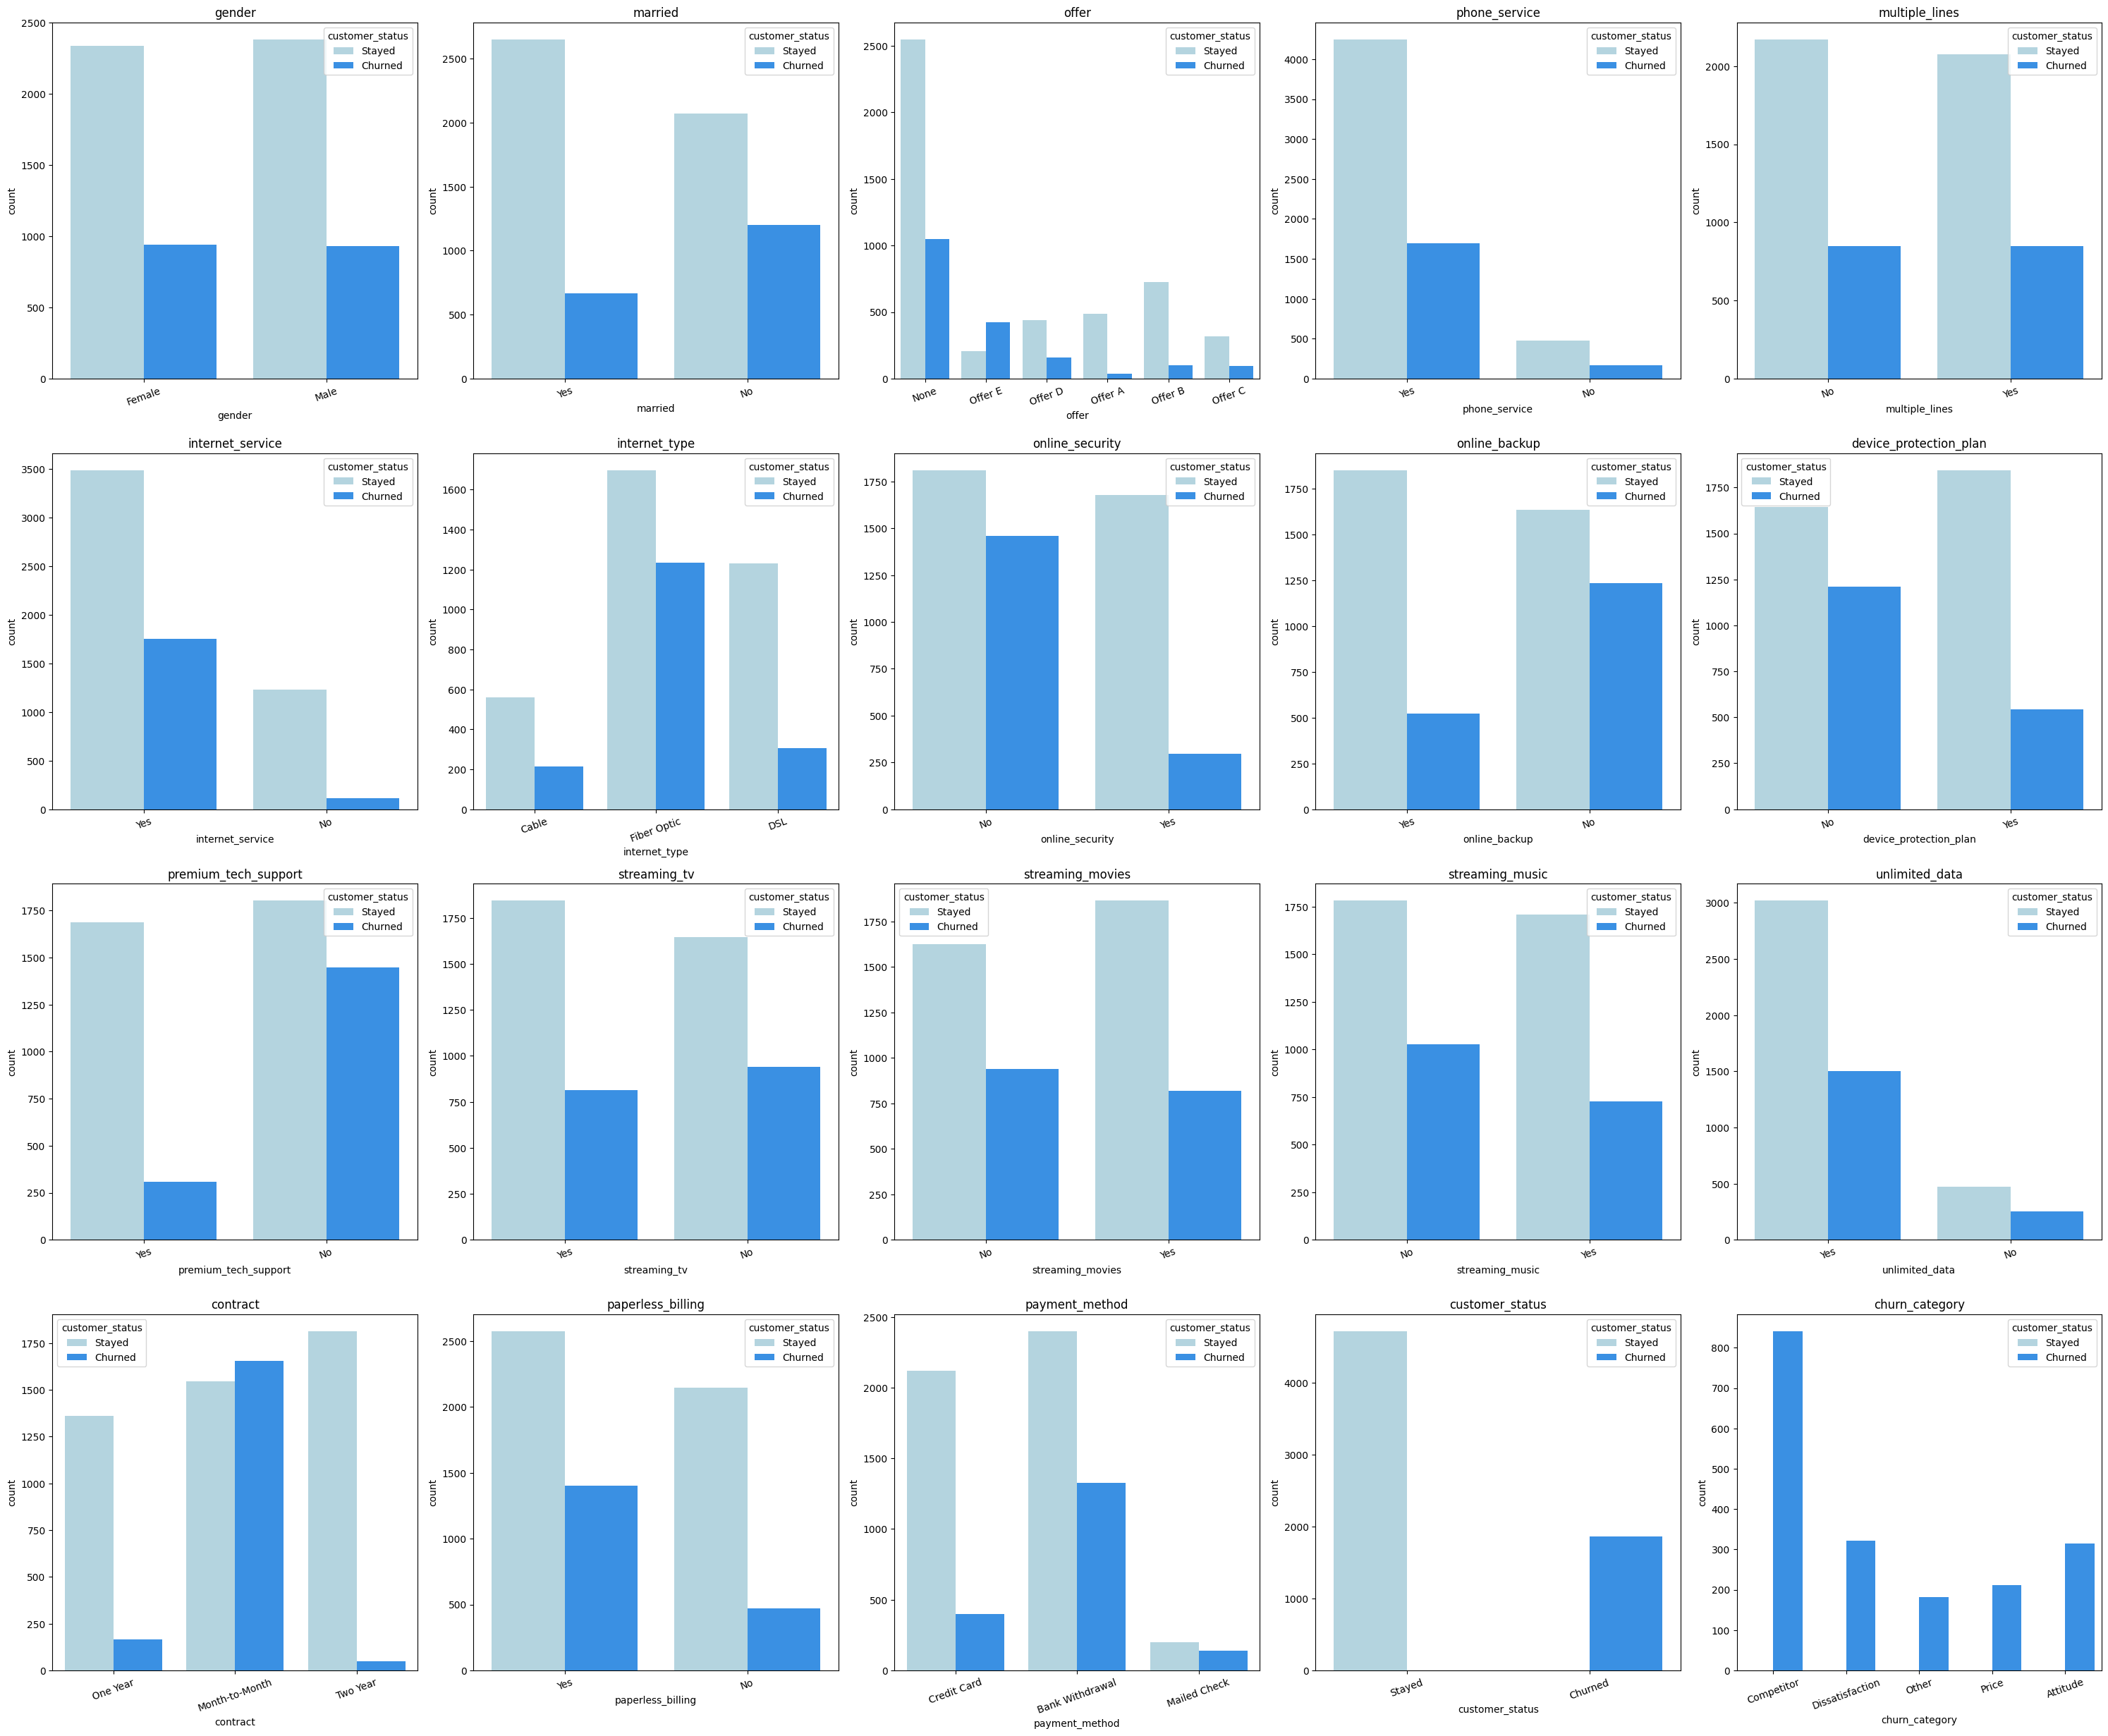

In [32]:
fig = plt.figure(figsize = (30, 30))

i = 1
for col in df_new_cat.columns:
    plt.subplot(5, 5, i)
    ax = sns.countplot(data = df_new_cat, x = df_new_cat[col], hue = 'customer_status', palette = ['lightblue', 'dodgerblue'])
    
    plt.title(str(col), loc='center')
    plt.xticks(rotation=20, fontsize=10)

    i += 1
        
plt.tight_layout()
plt.show()
#이탈 여부에 따른 범주들을 서브플랏으로 확인

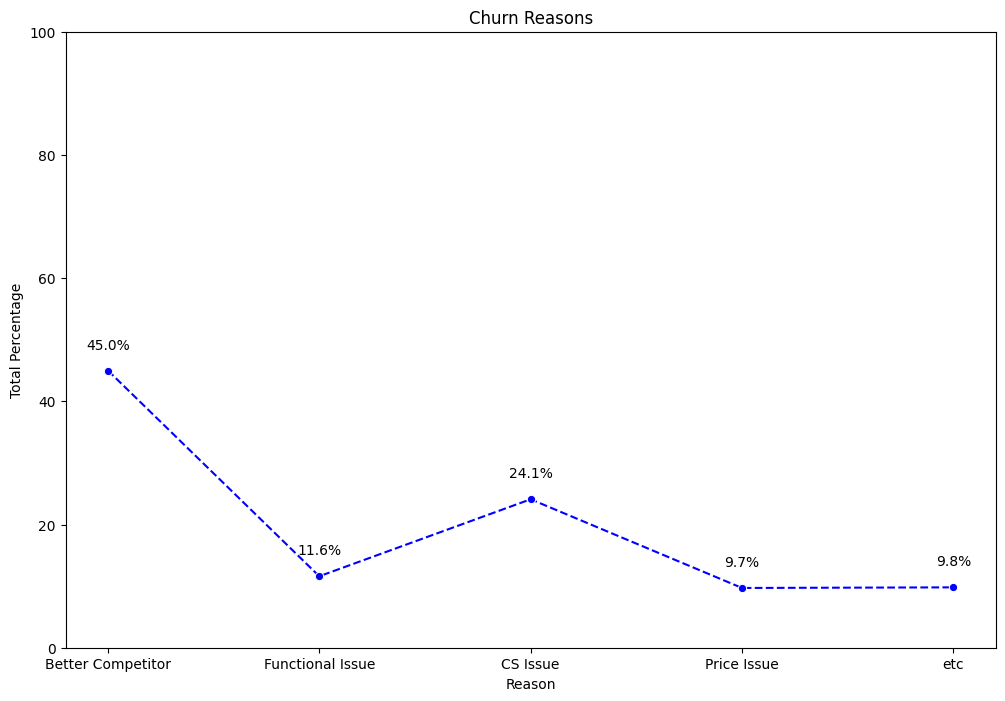

In [33]:
df_Churn_Reason = pd.DataFrame({'Reason':['Better Competitor','Functional Issue','CS Issue','Price Issue','etc'],
                                'Total Percentage':[45,11.6,24.1,9.7,9.8]})

fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(111) 
ax.set_ylim(0,100)  

sns.lineplot(data = df_Churn_Reason, x = 'Reason', y = 'Total Percentage',color = 'blue', linestyle='--',marker='o', ax=ax)

for x, y, label in zip(df_Churn_Reason['Reason'], df_Churn_Reason['Total Percentage'], df_Churn_Reason['Total Percentage']):
    ax.text(x, y+3, f'{label:.1f}%', ha='center', va='bottom')
    
plt.title('Churn Reasons') 

plt.show()

#이탈 원인을 카테고리 별로 묶어서 시각화

[Text(0.5, 0, ''), Text(0, 0.5, '')]

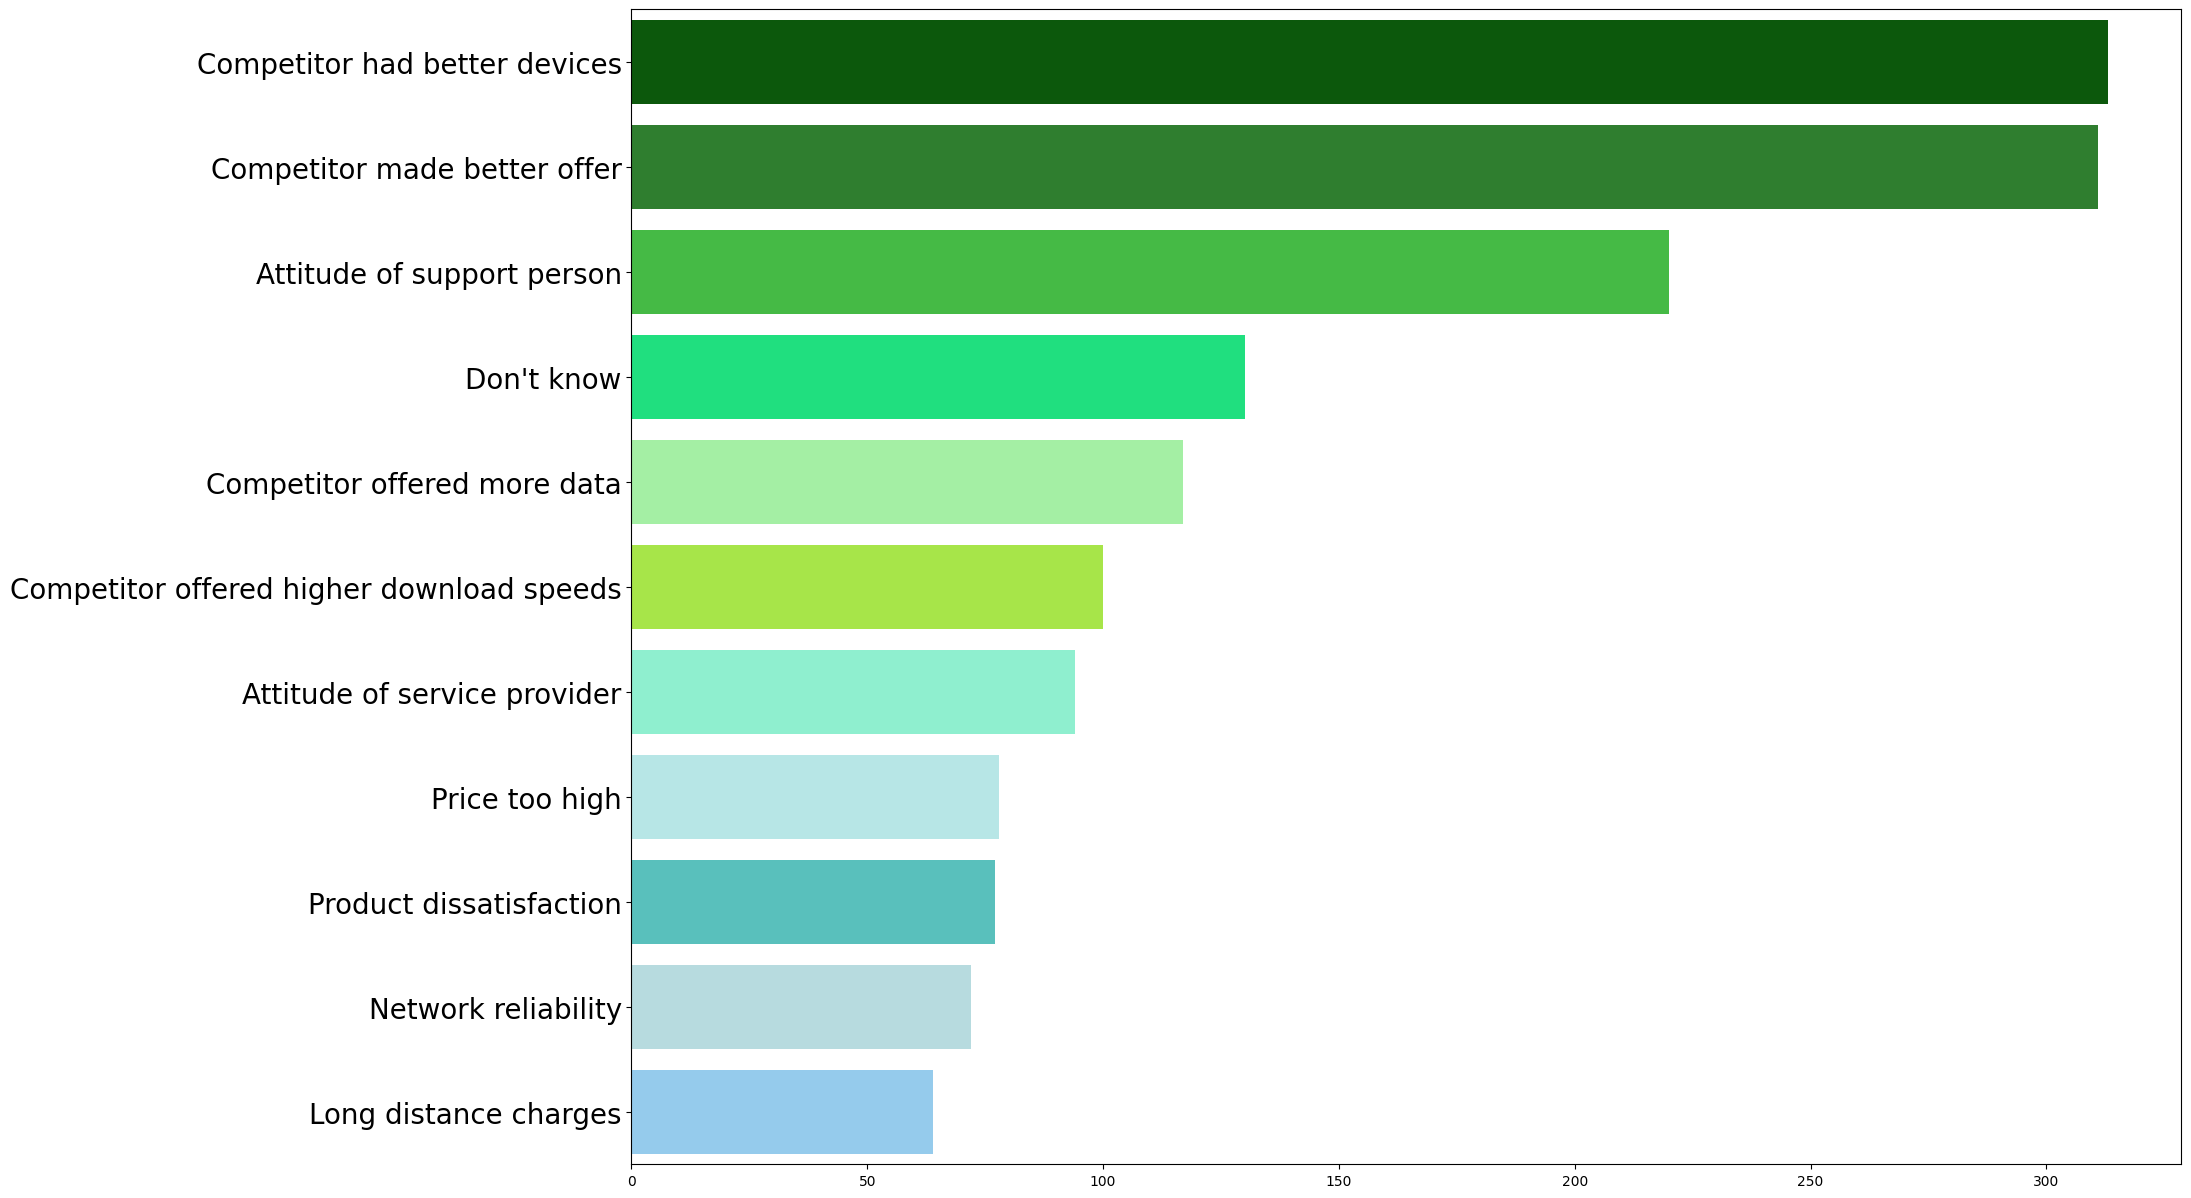

In [34]:
fig = plt.figure(figsize = (20, 15))
colors = ['darkgreen', 'forestgreen', 'limegreen', 'springgreen', 'palegreen', 'greenyellow','aquamarine','paleturquoise','mediumturquoise','powderblue','lightskyblue']
ax = sns.countplot(data = df, y = df['churn_reason'], order = df['churn_reason'].value_counts().head(11).index, palette=colors)
ax.tick_params(axis='y', labelsize=20)
ax.set(xlabel = None, ylabel = None)
# 세부 이유를 막대그래프를 통해 시각화

In [35]:
total_month_charge_out = df['monthly_charge'][df['customer_status'] == 'Churned'].sum()
print('매월 수입 감소량:', total_month_charge_out)

stayed_count = df[df['customer_status'] == 'Stayed'].shape[0]
print('유지 고객 수:', stayed_count)
print('감소량 충당시 인당 증가금액:', "{:.2f}".format(total_month_charge_out / stayed_count))

churned_count = df[df['customer_status'] == 'Churned'].shape[0]
print('이탈 고객 수:',churned_count)

mean_month_charge_new = df[df['customer_status'] == 'Joined']['monthly_charge'].mean()
print('신규 고객 월평균 요금:', "{:.2f}".format(mean_month_charge_new))

need_new_join = total_month_charge_out / mean_month_charge_new
print('충당을 위한 필요 신규가입자수:', int(need_new_join))

joined_count = df.loc[(df['customer_status'] == 'Joined') & (df['tenure_in_months'] == 1), 'customer_status'].count()
churned_count = df.loc[(df['customer_status'] == 'Churned') & (df['tenure_in_months'] == 1), 'customer_status'].count()
ratio = joined_count / (joined_count + churned_count) * 100
print('신규가입자의 유지 비율: {:.2f}%'.format(ratio))

#인사이트 도출을 위하여 기업의 이탈 고객으로 인한 월별 수입 감소금액을 제시하고 그 금액을 충당하는 방법 중 요금인상과
#신규고객 유치 두 가지 방법이 모두 힘듦을 보이고, 이탈 고객을 예측하여 유지시키는 것이 필요하다는 것을 보임

매월 수입 감소량: 137086.65
유지 고객 수: 4720
감소량 충당시 인당 증가금액: 29.04
이탈 고객 수: 1869
신규 고객 월평균 요금: 42.78
충당을 위한 필요 신규가입자수: 3204
신규가입자의 유지 비율: 38.01%


In [36]:
df.groupby(['customer_status'])['monthly_charge'].mean()

customer_status
Churned    73.347592
Joined     42.775991
Stayed     61.737415
Name: monthly_charge, dtype: float64

AttributeError: 'Wedge' object has no attribute 'set_height'

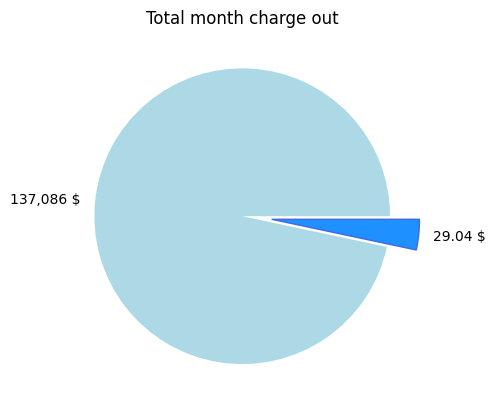

In [37]:
total_month_charge_out = 137086
stayed_count = 4720

labels = ['137,086 $', '29.04 $']
values = [total_month_charge_out, stayed_count]

colors = ['lightblue', 'dodgerblue']
highlight_index = 1
explode = [0, 0.20]

plt.pie(values, labels=labels, autopct='', colors=colors, startangle=0, explode=explode)
plt.title('Total month charge out')

highlight_angle = sum(values[:highlight_index]) / sum(values) * 360
wedge = plt.gca().patches[highlight_index]
wedge.set_edgecolor('royalblue')
wedge.set_linewidth(1)

sizes=[1, 1.2]

for i, w in enumerate(plt.gca().patches):
    w.set_width(sizes[i] * 1) 
    w.set_height(sizes[i] * 0.9)

plt.show()

#위의 월별 금액 손실을 충당하는 방법 중 가격인상 부분을 시각화

AttributeError: 'Wedge' object has no attribute 'set_height'

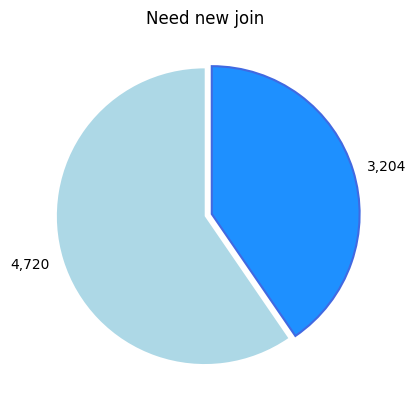

In [38]:
staye_count = 4720
need_new_join = 3204

labels = ['4,720', '3,204']
values = [stayed_count, need_new_join]

colors = ['lightblue', 'dodgerblue']
highlight_index = 1
explode = [0, 0.05]

plt.pie(values, labels=labels, autopct='', colors=colors, startangle=90, explode=explode)
plt.title('Need new join')

highlight_angle = sum(values[:highlight_index]) / sum(values) * 360
wedge = plt.gca().patches[highlight_index]
wedge.set_edgecolor('royalblue')
wedge.set_linewidth(1.5)

sizes=[1, 1.3]

for i, w in enumerate(plt.gca().patches):
    w.set_width(sizes[i] * 1)  # 원래 크기보다 조금 작게 설정
    w.set_height(sizes[i] * 1)

plt.show()

#신규가입자로 충당하는 방법의 어려움을 시각화

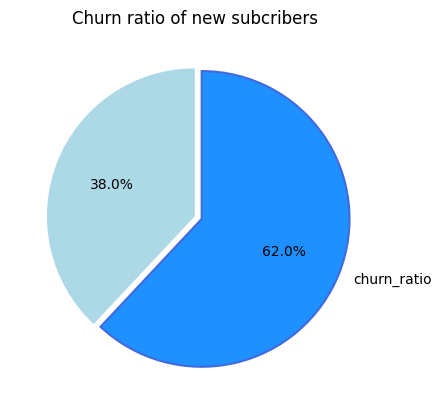

In [39]:
joined_count = df.loc[(df['customer_status'] == 'Joined') & (df['tenure_in_months'] == 1), 'customer_status'].count()
churned_count = df.loc[(df['customer_status'] == 'Churned') & (df['tenure_in_months'] == 1), 'customer_status'].count()

labels = ['', 'churn_ratio']
values = [joined_count, churned_count]

colors = ['lightblue', 'dodgerblue']
highlight_index = 1
explode = [0, 0.05]

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=explode)
plt.title('Churn ratio of new subcribers')

highlight_angle = sum(values[:highlight_index]) / sum(values) * 360
wedge = plt.gca().patches[highlight_index]
wedge.set_edgecolor('royalblue')
wedge.set_linewidth(1.5)

plt.show()

#가입기간이 1개월인 신규 가입자들 중 이탈 비율이 높음을 시각화

In [40]:
#통신사의 제공 서비스 중 인터넷과 모바일 그리고 두 서비스를 모두 사용하는 고객을 다른 데이터셋으로 분류
df_only_phone = df_new.loc[(df_new['internet_service'] == 'No') & (df_new['phone_service'] == 'Yes')]
df_only_internet = df_new.loc[(df_new['internet_service'] == 'Yes') & (df_new['phone_service'] == 'No')]
df_both_service = df_new.loc[(df_new['internet_service'] == 'Yes') & (df_new['phone_service'] == 'Yes')]

In [41]:
#서비스 유형별 가입형태의 고객 수를 카운트
only_phone_count = df_only_phone['phone_service'].count() 
only_internet_count = df_only_internet['internet_service'].count()
use_all_count = df_both_service['phone_service'].count()
print(only_phone_count)
print(only_internet_count)
print(use_all_count)

1344
644
4601


In [42]:
#카운트한 고객 수를 바탕으로 비율을 계산
only_phone_churn_count = df_only_phone.loc[(df['customer_status'] == 'Churned'), 'customer_status'].count()
only_internet_churn_count = df_only_internet.loc[(df['customer_status'] == 'Churned'), 'customer_status'].count()
both_churn_count = df_both_service.loc[(df['customer_status'] == 'Churned'), 'customer_status'].count()
phone_ratios = only_phone_churn_count / only_phone_count
internet_ratios = only_internet_churn_count / only_internet_count
both_ratios = both_churn_count / use_all_count

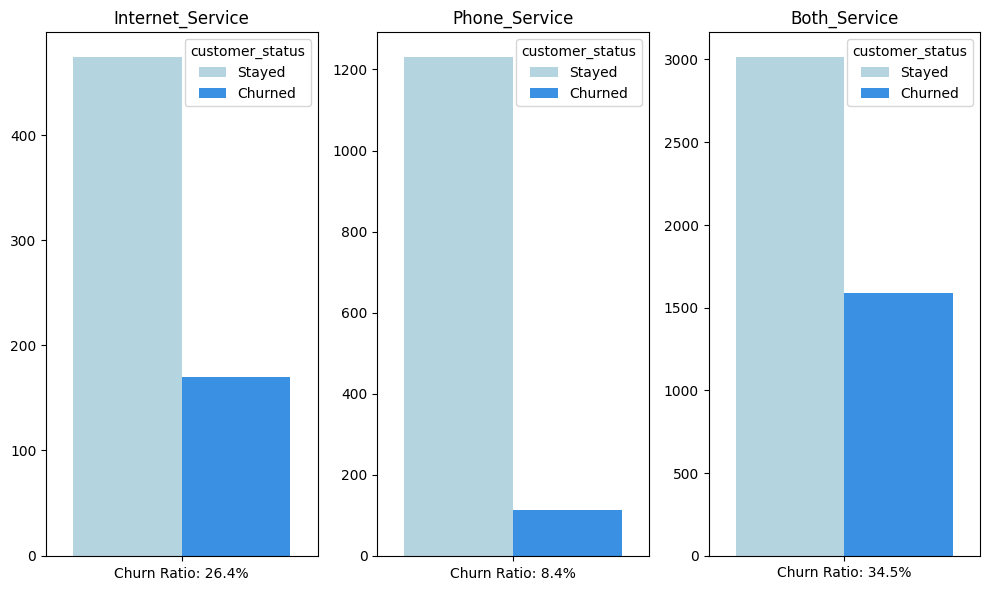

In [43]:
#가입 형태별 고객의 이탈숫자와 비율을 서브플랏으로 시각화
fig, axes = plt.subplots(1, 3, figsize = (10,6))

axes[0].set_title("Internet_Service")
sns.countplot(data=df_only_internet, x=df_only_internet['internet_service'], hue='customer_status', palette=['lightblue', 'dodgerblue'], ax=axes[0])
axes[0].set_xticklabels([])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].text(0, -10, f'Churn Ratio: {internet_ratios*100:.1f}%', ha='center', va='top')


axes[1].set_title("Phone_Service")
sns.countplot(data=df_only_phone, x=df_only_phone['phone_service'], hue='customer_status', palette=['lightblue', 'dodgerblue'], ax=axes[1])
axes[1].set_xticklabels([])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].text(0, -28, f'Churn Ratio: {phone_ratios*100:.1f}%', ha='center', va='top')


axes[2].set_title("Both_Service")
sns.countplot(data=df_both_service, x=df_both_service['phone_service'], hue='customer_status', palette=['lightblue', 'dodgerblue'], ax=axes[2])
axes[2].set_xticklabels([])
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].text(0, -60, f'Churn Ratio: {both_ratios*100:.1f}%', ha='center', va='top')

plt.tight_layout()
plt.show()

각 그래프 별로 탈퇴 이유 이어서 붙여보기

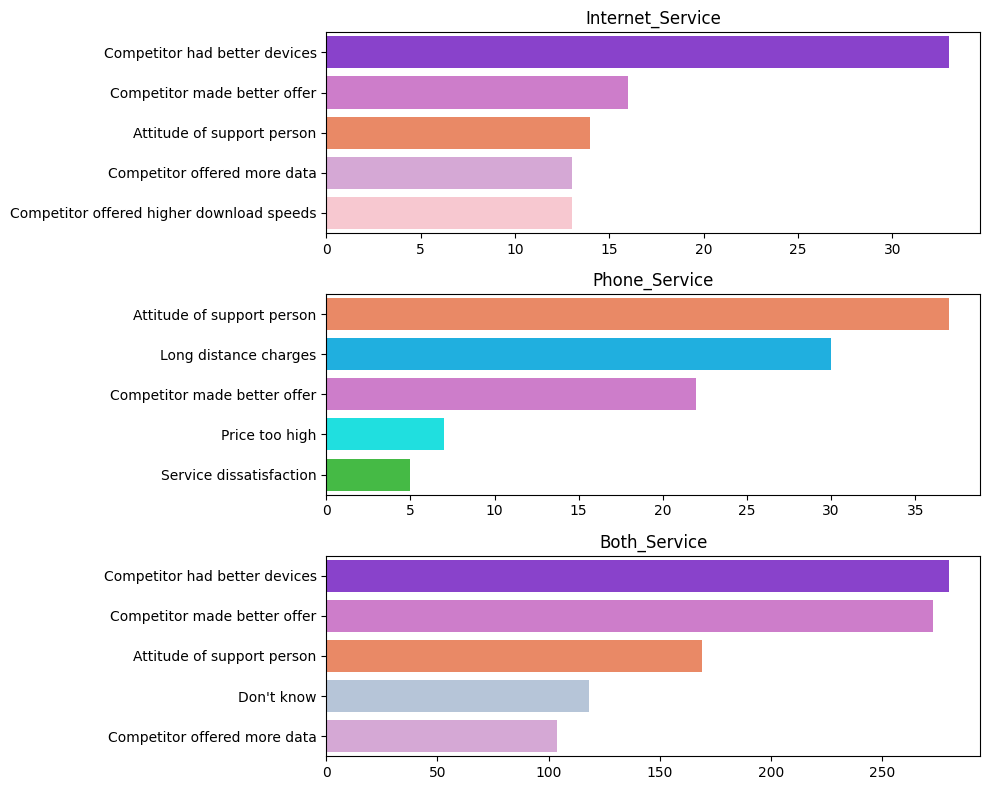

In [44]:
fig, axes = plt.subplots(3,1, figsize=(10,8))

axes[0].set_title("Internet_Service")
colors_1=['blueviolet', 'orchid', 'coral', 'plum', 'pink']
sns.countplot(data = df_only_internet, y = df_only_internet['churn_reason'], order = df_only_internet['churn_reason'].value_counts().head(5).index, palette=colors_1, ax=axes[0])
axes[0].set(xlabel = None, ylabel = None)

axes[1].set_title("Phone_Service")
colors_2=['coral', 'deepskyblue', 'orchid', 'aqua', 'limegreen']
sns.countplot(data = df_only_phone, y = df_only_phone['churn_reason'], order = df_only_phone['churn_reason'].value_counts().head(5).index, palette=colors_2, ax=axes[1])
axes[1].set(xlabel = None, ylabel = None)

axes[2].set_title("Both_Service")
colors_3=['blueviolet', 'orchid', 'coral', 'lightsteelblue', 'plum']
sns.countplot(data = df_both_service, y = df_both_service['churn_reason'], order = df_both_service['churn_reason'].value_counts().head(5).index, palette=colors_3, ax=axes[2])
axes[2].set(xlabel = None, ylabel = None)

plt.tight_layout()
plt.show()

#같은 원인은 같은 색으로 표현

이를 통해 전반적으로 경쟁사에 의한 고객 이탈 경향이 전체고객의 이탈사유처럼 이어진다는 것을 알 수 있었고
폰 서비스 쪽에서 두드러진 장거리 추가 요금 및 월 요금과 이탈의 관계를 보기 위해 지도에 찍어보았다

지도 쪽을 확인 후
인사이트 도출 시작

In [45]:
# 인사이트 도출 시 필요한 그래프를 그리기 위한 함수 생성
def graph_feature_churn_rate_by_class(col, classes, classes_desc, figsize=(6, 6), print_info=False):
    churned = []
    stayed = []
    for cls in classes:
        counts = df_new[df_new[col]==cls]["customer_status"].value_counts()
        churned.append(counts[1])
        stayed.append(counts[0])

    percent_churned = [f"{round(churned[i] / (churned[i] + stayed[i]) * 100, 0)}% churned" for i in range(len(classes))]

    plt.figure(figsize=figsize)
    bar1 = plt.bar(classes_desc, churned, color='dodgerblue')
    bar2 = plt.bar(classes_desc, stayed, bottom=churned, color='lightblue')
    plt.bar_label(bar2, percent_churned)
    plt.ylabel("Number of customers")
    plt.legend(["Churned", "Stayed"])
    plt.show()

    if print_info:
        print(churned, stayed, percent_churned)

In [20]:
df_new["senior"] = (df_new["age"] >= 64).astype(int)

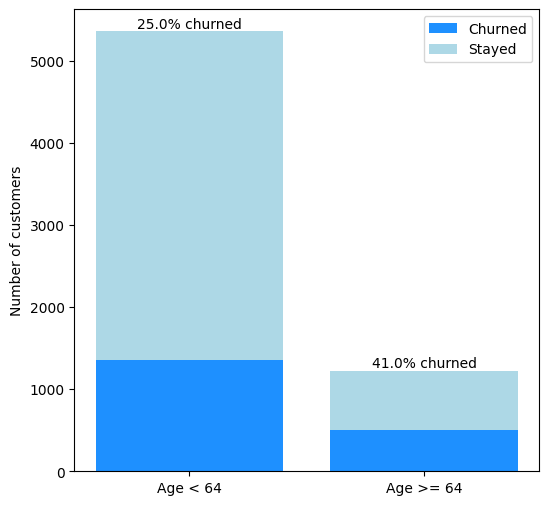

In [21]:
#노인 여부에 따른 이탈률 시각화
graph_feature_churn_rate_by_class("senior", [0, 1], ["Age < 64", "Age >= 64"])

In [22]:
df_new["Married"] = (df_new["married"] == 'Yes')

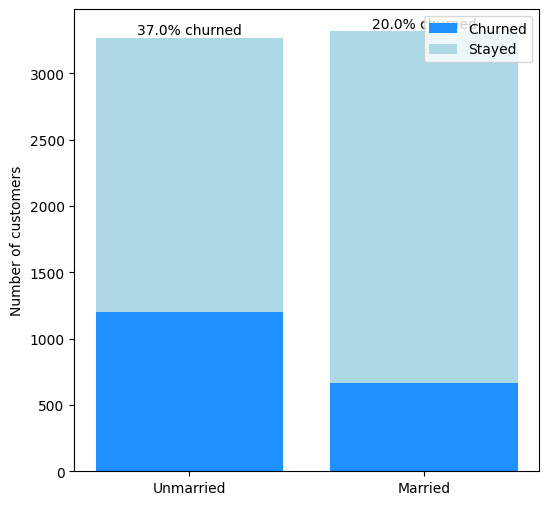

In [23]:
#결혼 여부에 따른 이탈률 시각화
graph_feature_churn_rate_by_class("Married", [0, 1], ["Unmarried", "Married"])

In [7]:
#범주가 두 개가 아닌 여러 개의 경우를 그리기 위해 가입기간에 따라 함수로 범주 구분
def classify_tenure_in_months(tenure):
    if tenure >= 0 and tenure < 12:
        return 0
    elif tenure >= 12 and tenure < 24:
        return 1
    elif tenure >=24 and tenure < 36:
        return 2
    elif tenure >= 36 and tenure < 60:
        return 3
    return 4

df_new['tenure_class'] = df_new['tenure_in_months'].apply(classify_tenure_in_months)
df_new['tenure_class'].value_counts().sort_index()

0    1615
1    1047
2     876
3    1568
4    1483
Name: tenure_class, dtype: int64

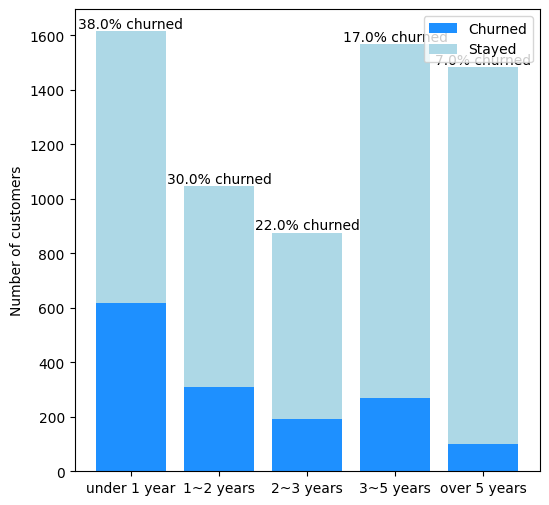

In [8]:
# 가입 기간에 따라 이탈률 시각화
graph_feature_churn_rate_by_class('tenure_class', [0,1,2,3,4],['under 1 year','1~2 years','2~3 years','3~5 years','over 5 years'])

In [ ]:
#마케팅 오퍼에 따른 이탈률 시각화
ax = sns.countplot(data=df_new, x='offer', hue='customer_status', palette=['lightblue', 'dodgerblue'])

plt.title('Customer Status by Offers')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=20, fontsize=10)

plt.show()

In [26]:
df_new["Paperless Billing"] = (df_new["paperless_billing"] == 'Yes')

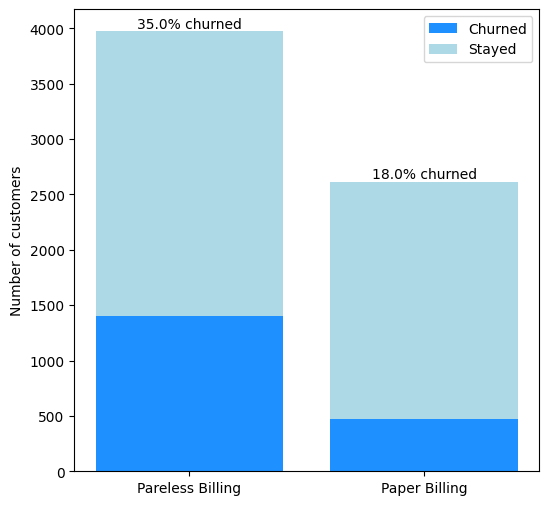

In [27]:
#전자 영수증 여부에 따른 이탈률
graph_feature_churn_rate_by_class('Paperless Billing', [1,0], ['Pareless Billing', 'Paper Billing'])

In [28]:
#범주가 두 개가 아닌 3개의 경우를 그리기 위해 지불방식에 따라 함수로 범주 구분
def classify_method(method):
    if method == 'Bank Withdrawal':
        return 0
    elif method == 'Credit Card':
        return 1
    return 2

df_new['method_class'] = df_new['payment_method'].apply(classify_method)
df_new['method_class'].value_counts().sort_index()

0    3728
1    2518
2     343
Name: method_class, dtype: int64

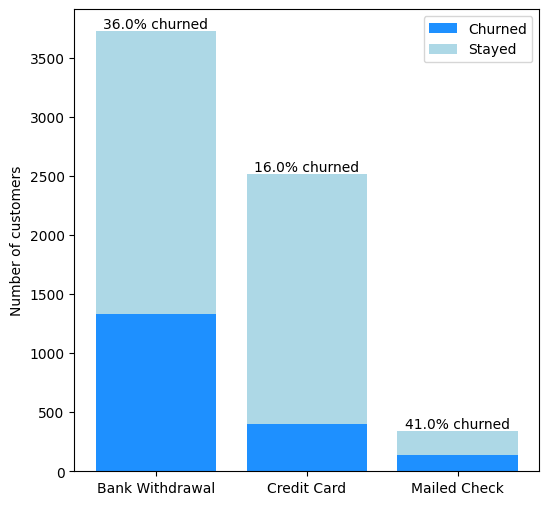

In [29]:
# 지불방식에 따른 이탈률 시각화
graph_feature_churn_rate_by_class('method_class', [0,1,2],['Bank Withdrawal','Credit Card','Mailed Check'])

In [24]:
# 범주가 두 개가 아닌 3개의 경우를 그리기 위해 약정기간에 따라 함수로 범주 구분
def classify_contracts(contract):
    if contract == 'Month-to-Month':
        return 0
    elif contract == 'One Year':
        return 1
    return 2

df_new['contract_class'] = df_new['contract'].apply(classify_contracts)
df_new['contract_class'].value_counts().sort_index()

0    3202
1    1526
2    1861
Name: contract_class, dtype: int64

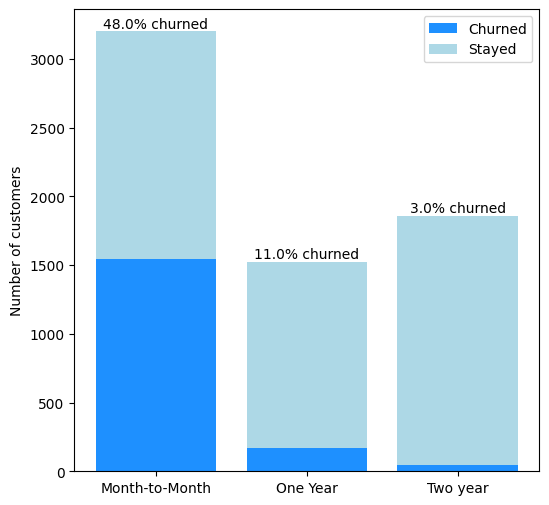

In [25]:
#약정 기간에 따른 이탈률 시각화
graph_feature_churn_rate_by_class('contract_class', [0,1,2],['Month-to-Month','One Year','Two year'])

In [12]:
#추천 횟수에 따라 함수로 범주 구분
def classify_referrals(referral):
    if referral == 0:
        return 0
    elif referral == 1:
        return 1
    return 2

df_new['referral_class'] = df_new['number_of_referrals'].apply(classify_referrals)
df_new['referral_class'].value_counts().sort_index()

0    3448
1    1071
2    2070
Name: referral_class, dtype: int64

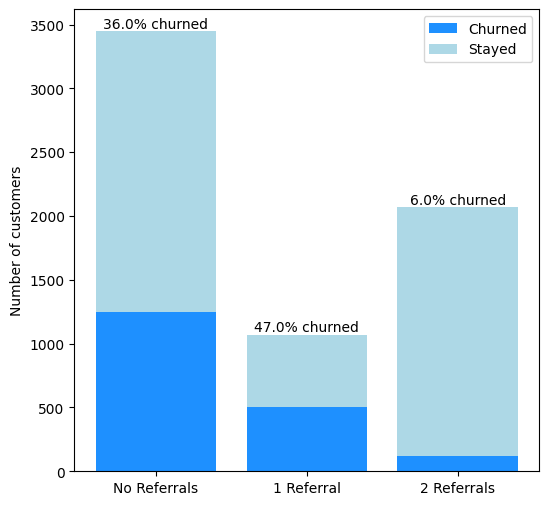

In [14]:
#추천 횟수에 따른 이탈률 시각화
graph_feature_churn_rate_by_class("referral_class", [0, 1, 2], ["No Referrals", "1 Referral", "2 Referrals"])

In [15]:
df_new["dependents"] = (df_new["number_of_dependents"] >= 1).astype(int)

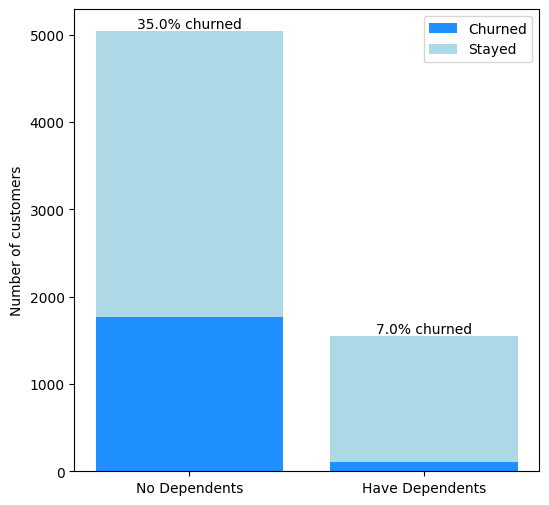

In [16]:
#부양가족 유무에 따른 이탈률
graph_feature_churn_rate_by_class("dependents", [0, 1], ["No Dependents", "Have Dependents"])